### Controle de Inadimplência em Operações de Crédito

Uma Fintech de Crédito iniciou sua operação de concessão de empréstimo pessoal e acompanhou a performance de pagamento de 1.000 clientes após 1 ano. Com base dessa amostra, pediu para a área de Análise de Dados verificar quais fatores de risco dos clientes de forma a conseguir aprovar mais contratos com a menor inadimplência possível.

#### Objetivo

O objetivo deste estudo de caso é verificar quais foram os insights obtidos com a realização dessas análises. Além disso, verificar quais fatores de risco estão mais associados à inadimplência.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'1.4.4'

In [3]:
np.__version__

'1.21.5'

In [6]:
df = pd.read_excel('C:\_Cursos\Python_Analise_Dados\Base_Inadimplencia.xlsx', sheet_name='Base')

In [7]:
df.shape

(1000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Sexo                  1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Inadimplencia         1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [9]:
df.head()

,Idade,Sexo,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Inadimplencia
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1
2,49,M,Pos Graduacao,Propria,Pouco,Sem conta,2096,12,0
3,45,M,Graduacao,De favor,Pouco,Pouco,7882,42,0
4,53,M,Graduacao,De favor,Pouco,Pouco,4870,24,1


In [10]:
df.isna().sum()

Idade                   0
Sexo                    0
Escolaridade            0
Tipo_Moradia            0
Saldo_Investimento      0
Saldo_Conta_Corrente    0
Valor_Emprestimo        0
Duracao_Emprestimo      0
Inadimplencia           0
dtype: int64

In [11]:
df.duplicated().sum()

0

Análise: Não foram encontrados dados faltantes ou duplicados na base.

### Análise do Valor do Empréstimo

In [29]:
valor_emprestimo = df['Valor_Emprestimo']

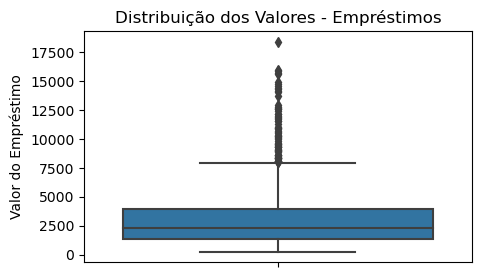

In [73]:
plt.figure(figsize=(5,3))
sns.boxplot(y=valor_emprestimo)
plt.title('Distribuição dos Valores - Empréstimos', fontsize=12)
plt.ylabel('Valor do Empréstimo')
plt.show()

In [32]:
df['Valor_Emprestimo'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Valor_Emprestimo, dtype: float64

Análise: A amostra apresenta que a média do valor de empréstimo é de 3.271 reais. De acordo com a amostra, o primeiro quartil apresenta valor até 1.365 reais; o terceiro quartil apresenta valor até 3.972 reais. Ou seja, a amostra apresenta baixa variabilidade entre os valores, porém há outliers.

In [49]:
df['status_Inadimp'] = np.where(df['Inadimplencia'] == 0, 'Nao', 'Sim')

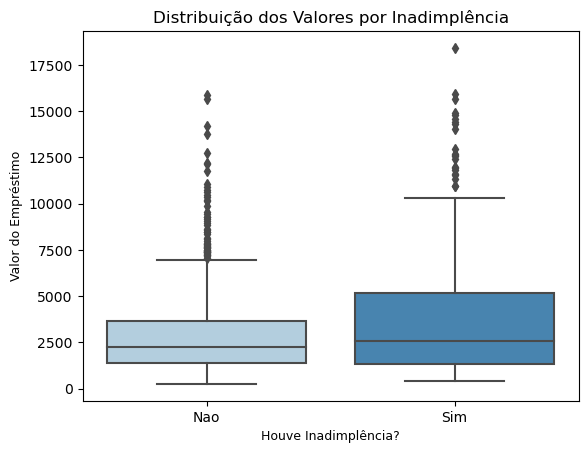

In [70]:
sns.boxplot(x=df['status_Inadimp'],y=df['Valor_Emprestimo'], palette='Blues')
plt.title('Distribuição dos Valores por Inadimplência', fontsize=12)
plt.xlabel('Houve Inadimplência?', fontsize=9)
plt.ylabel('Valor do Empréstimo',fontsize=9);

### Correlação das Variáveis Quantitativas

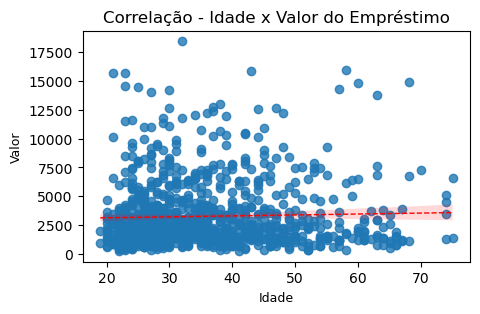

In [78]:
plt.figure(figsize=(5,3))
sns.regplot(df['Idade'], df['Valor_Emprestimo'], line_kws={'color':'red', 'linestyle':'--', 'linewidth': 1})
plt.title('Correlação - Idade x Valor do Empréstimo', fontsize=12)
plt.xlabel('Idade',fontsize=9)
plt.ylabel('Valor', fontsize=9);

In [48]:
df['Idade'].corr(df['Valor_Emprestimo'], method='pearson')

0.032716416665448125

Análise: Existe uma fraca correlação entre as variávies 'idade' e 'valor do empréstimo'.

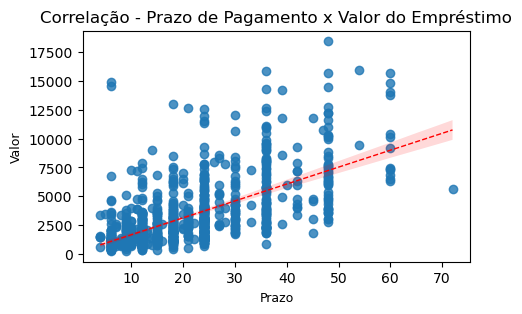

In [77]:
plt.figure(figsize=(5,3))
sns.regplot(df['Duracao_Emprestimo'], df['Valor_Emprestimo'], line_kws={'color':'red', 'linestyle':'--', 'linewidth':1})
plt.title('Correlação - Prazo de Pagamento x Valor do Empréstimo')
plt.xlabel('Prazo',fontsize=9)
plt.ylabel('Valor',fontsize=9);

In [64]:
df['Valor_Emprestimo'].corr(df['Duracao_Emprestimo'], method='pearson')

0.6249841983009837

Análise: Há uma fraca correlação entre as variáveis 'valor do empréstimo' e 'duração do empréstimo'

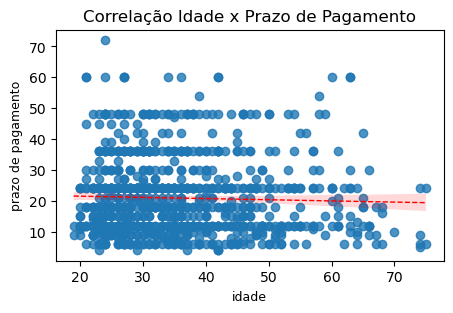

In [79]:
plt.figure(figsize=(5,3))
sns.regplot(df['Idade'], df['Duracao_Emprestimo'], line_kws={'color':'red', 'linestyle':'--', 'linewidth':1})
plt.title('Correlação Idade x Prazo de Pagamento', fontsize=12)
plt.xlabel('idade', fontsize=9)
plt.ylabel('prazo de pagamento', fontsize=9);
plt.savefig('grafico5_seaborn.png', dpi=300, bbox_inches='tight')

In [72]:
df['Idade'].corr(df['Duracao_Emprestimo'], method='pearson')

-0.03613637401909832

Análise: Há uma forte correlação negativa entre as variáveis 'idade' e 'duração do empréstimo'.